# <img src="ups.png">

### Nombre: Fanny Gutama
### Docente: Ing. Diego Quisi

## Regresion Lineal.


# Covid-19 infección en Ecuador. Modelos matemáticos y predicciones
Una comparación de modelos, lineal, polilnomico,logísticos y exponenciales aplicados a la infección por el virus Covid-19

Se realiza un análisis matemático simple del crecimiento de la infección en Python y dos modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de curva.

In [16]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('owid-covid-data.csv').fillna(0)
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] 
ndf1=ndf[['date','total_cases','total_deaths']]
x=np.arange(1,len(ndf1)+1,1)
y=np.array(ndf1.values[:,1])
y1=np.array(ndf1.values[:,2])



In [18]:

df = df[df['location'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['date','total_cases','iso_code']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2019-12-30", FMT)).days)

df

,date,total_cases,iso_code
14965,1,0.0,ECU
14966,2,0.0,ECU
14967,3,0.0,ECU
14968,4,0.0,ECU
14969,5,0.0,ECU
...,...,...,...
15277,313,172508.0,ECU
15278,314,173486.0,ECU
15279,315,174907.0,ECU
15280,316,175269.0,ECU


In [19]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) 
exp_fit1 = curve_fit(modelo_logistico,x,y1) 

print(exp_fit)
print("")
print(exp_fit1)

(array([-139418.21968208,   46699.81937434]), array([[ 84876808.72596902, -17896201.08634508],
       [-17896201.08634508,   3941788.34758305]]))

(array([-10970.99926502,   3622.5394974 ]), array([[ 619139.23512667, -130544.96786689],
       [-130544.96786689,   28753.62382701]]))


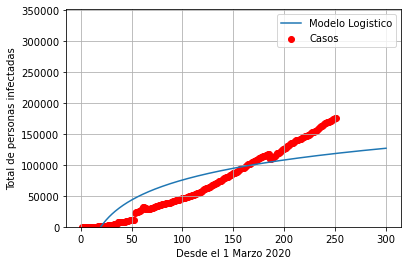

In [20]:
pred_x = list(range(min(x),max(x)+50))
plt.scatter(x,y,label="Casos",color="red")
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.grid(True)
plt.xlabel("Desde el 1 Marzo 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim(0,max(y)*2) 
plt.show()

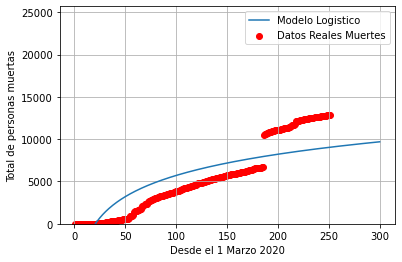

In [21]:
plt.scatter(x,y1,label="Datos Reales Muertes",color="red")
plt.plot(pred_x, [modelo_logistico(i,exp_fit1[0][0],exp_fit1[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.grid(True)
plt.xlabel("Desde el 1 Marzo 2020")
plt.ylabel("Total de personas muertas")
plt.ylim(0,max(y1)*2)
plt.show()

# Criterio personal (politico, economico y social de la situacion)
El ambito politico frente al covid juega un papel muy importante, ya que un buen manejo de los recursos del pais, puede dar una pronta respuesta a la pandemia mediante un buen manejo de entidades de salud y una buena planificacion, esto de cierta forma ayudaria a reducir los contagios y a manejar de mejor manera, ya que en pleno rebrote fuimos uno de los paises latinoamericanos mas afectado y con un alto indice de mortalidad como consecuencia del mal manejo y de la descarada corrupcion que existe, en cuanto a lo economico, es una etapa bastante dificil para el pais y su comunidad, debido a que la tasa de subempleo incrementa y tambien existen reduccion en la nomida de empleados, lo que trae consigo como consecuencia, que las personas no tengan dinero para mantenerse, tampoco puden acceder a la canasta basica, que desencadena en varios factores tales como desnutricion, enfermedades, personas sin hogar por la falta de posibilidades economicas, otros buscan obtener ingresos mediante microemprendimientos, para aliviar de cierta forma este problema, y en lo social haciendo referencia a puntos mencionados anteriormente se puede decir que afecta a todas las personas, en distintos ambitos tales como empleo, ingresos, comercios, salud, vivieda.